# Avance 4. Modelos alternativos

### Integrantes:

- **A01794940** José de Jesús Peña Rodríguez.  
- **A01283104** Kevin Dueñas Aguirre.  
- **A01794191** Juan Antonio Chiñas Mata.


In [17]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import importlib
import kmean_func
from sklearn.cluster import MeanShift, estimate_bandwidth
importlib.reload(kmean_func)

<module 'kmean_func' from '/Users/josedejesuspena/Documents/IntProject_Team8/IntProject_Team8/notebooks/kmean_func.py'>

# Reading CSV file from local route

In [18]:
warnings.filterwarnings("ignore")
CSV_PATH = "dataset/Datos_Imgenes.csv"
df = pd.read_csv(kmean_func.read_csv(CSV_PATH))

## Data Preprocessing  
During a preliminary session with our tutor, we identified several columns that either lacked relevant information or contained redundant data already available in other columns. As a result, we decided to remove the following columns:  

- **index**  
- **date**  
- **page**  
- **TotalPages**  
- **ModelApplied**  
- **Details**  
- **ModelReported** 
- **ConfR** 
- **ConfA** 
- **ConfW** 
- **DocType**


## Project Objective  
The primary objective of this project is to develop a solution for classifying groups of documents based on their quality. To achieve this, we will use the following columns as features:  

- **PagesProcessed**  
- **Fields**  
- **EmptyFields**  
- **Sharpness**  
- **Contrast**  
- **Clarity**  
- **Resolution**  

## Machine Learning Models  
The models involved in this process include:  

- **Model**  
- **Estado_cuenta**  
- **Recibo_nomina**  
- **INE**  
- **Comprobante_domicilio**  
- **Carta_libranza**  


In [19]:
columns_to_delete = ["Index", "Date", "Page", "TotalPages","ModelApplied", "ConfR", "ConfA", "ConfW","Details","ModelReported","DocType"]
df = df.drop(columns=columns_to_delete, axis=1)

# Creating a filter on Model column 

## Data Filtering and Preparation  

In the following cells, we will apply filters to our base dataframe `df`, to extract a new dataframe called `models`.  

The `models` dataframe will allow us to apply further filtering and generate new dataframes, each containing the necessary information for clustering.  


In [20]:
models = df["Model"].value_counts()
models

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64

In [21]:
df_edo_cta = kmean_func.col_filter(df, "Model", "estado_cuenta")
df_nom = kmean_func.col_filter(df, "Model", "recibo_nomina")
df_ine = kmean_func.col_filter(df, "Model", "ine")
df_addy = kmean_func.col_filter(df, "Model", "comprobante_domicilio")
df_lib = kmean_func.col_filter(df, "Model", "carta_libranza")

# PREPROCESING PER MODEL 

Since we are clustering based on the model type rather than the document type, we will start by dropping the `Model` and `Classid` columns, as all models have already been filtered and are ready for use.

In [22]:
df_edo_cta.drop(columns=["Model","ClassId"], inplace=True)
df_nom.drop(columns=["Model","ClassId"], inplace=True)
df_ine.drop(columns=["Model","ClassId"], inplace=True)
df_addy.drop(columns=["Model","ClassId"], inplace=True)
df_lib.drop(columns=["Model","ClassId"], inplace=True)

The feature set (X) will be the same for all clustering algorithms. Therefore, we first generate all possible feature pairs and combine them into a single list. This final X will serve as the input for each model we train.

In [23]:
#Make a list for all df columns 
list_col = list(df_edo_cta.columns)

#Get the combinations between columns
X_var = kmean_func.var_comb(list_col)

#Make pairs between columns
X_pairs = kmean_func.pairs_x(list_col, X_var) 

## Clustering Process Using K-Means  

This process will be followed for each model:  

- **Estado_cuenta**  
- **Recibo_nomina**  
- **INE**  
- **Comprobante_domicilio**  
- **Carta_libranza**  

### Step-by-Step Process  

1. **Extract Feature Set (X)**  
   - Select the relevant data from the filtered DataFrame.  

2. **Determine Optimal Number of Clusters**  
   - Compute the Within-Cluster Sum of Squares (WSS) for different cluster counts.  
   - Plot the elbow graph to identify the optimal number of clusters.  

3. **Train the K-Means Model**  
   - Apply K-Means clustering using the selected number of clusters.  
   - Visualize clustering results by plotting all possible feature combinations:  
     - **PagesProcessed**  
     - **Fields**  
     - **EmptyFields**  
     - **Sharpness**  
     - **Contrast**  
     - **Clarity**  
     - **Resolution**  

4. **Analyze Insights**  
   - Once the graphs are generated, analyze the clusters to gain meaningful insights.  


## Model- Estado cuenta

In [24]:
df_edo_cta.head()

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
4,2,27,1,262.0,36.0,9512.0,479.0
5,2,27,1,273.0,35.0,9706.0,491.0
10,4,27,18,1573.0,64.0,100811.0,1446.0
11,4,27,18,25.0,38.0,981.0,101.0
12,4,27,18,154.0,51.0,7973.0,340.0


### Getting the correct number of Clusters

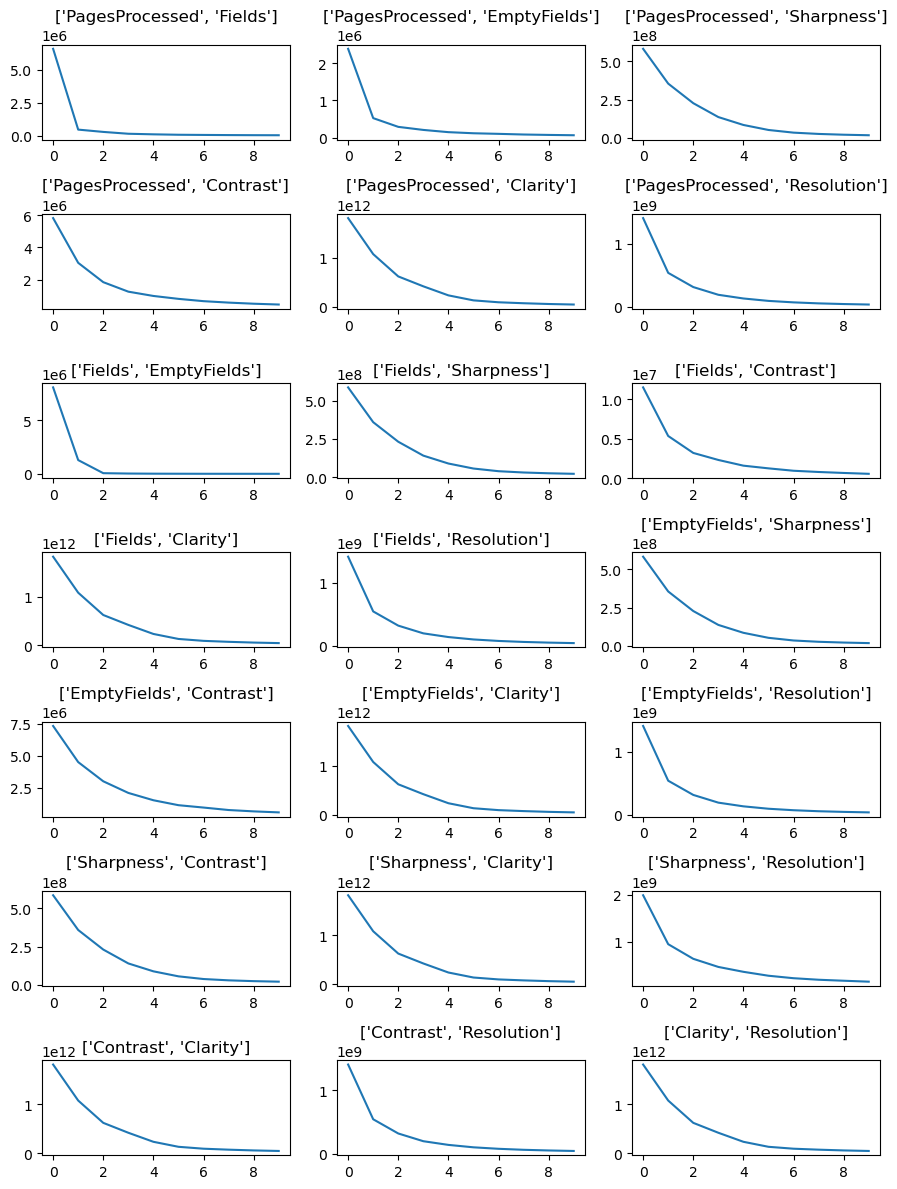

In [25]:
#Make the X by joining the minilists of pairs
X_edo_cta = kmean_func.get_x(X_pairs, df_edo_cta)

#Calculates de wss 
edo_cta_wss = kmean_func.wss_list(X_edo_cta)

#Plot Elbow graphs for each pair 
kmean_func.plt_elbow(edo_cta_wss,X_var)

### Clustering by KMEANS method

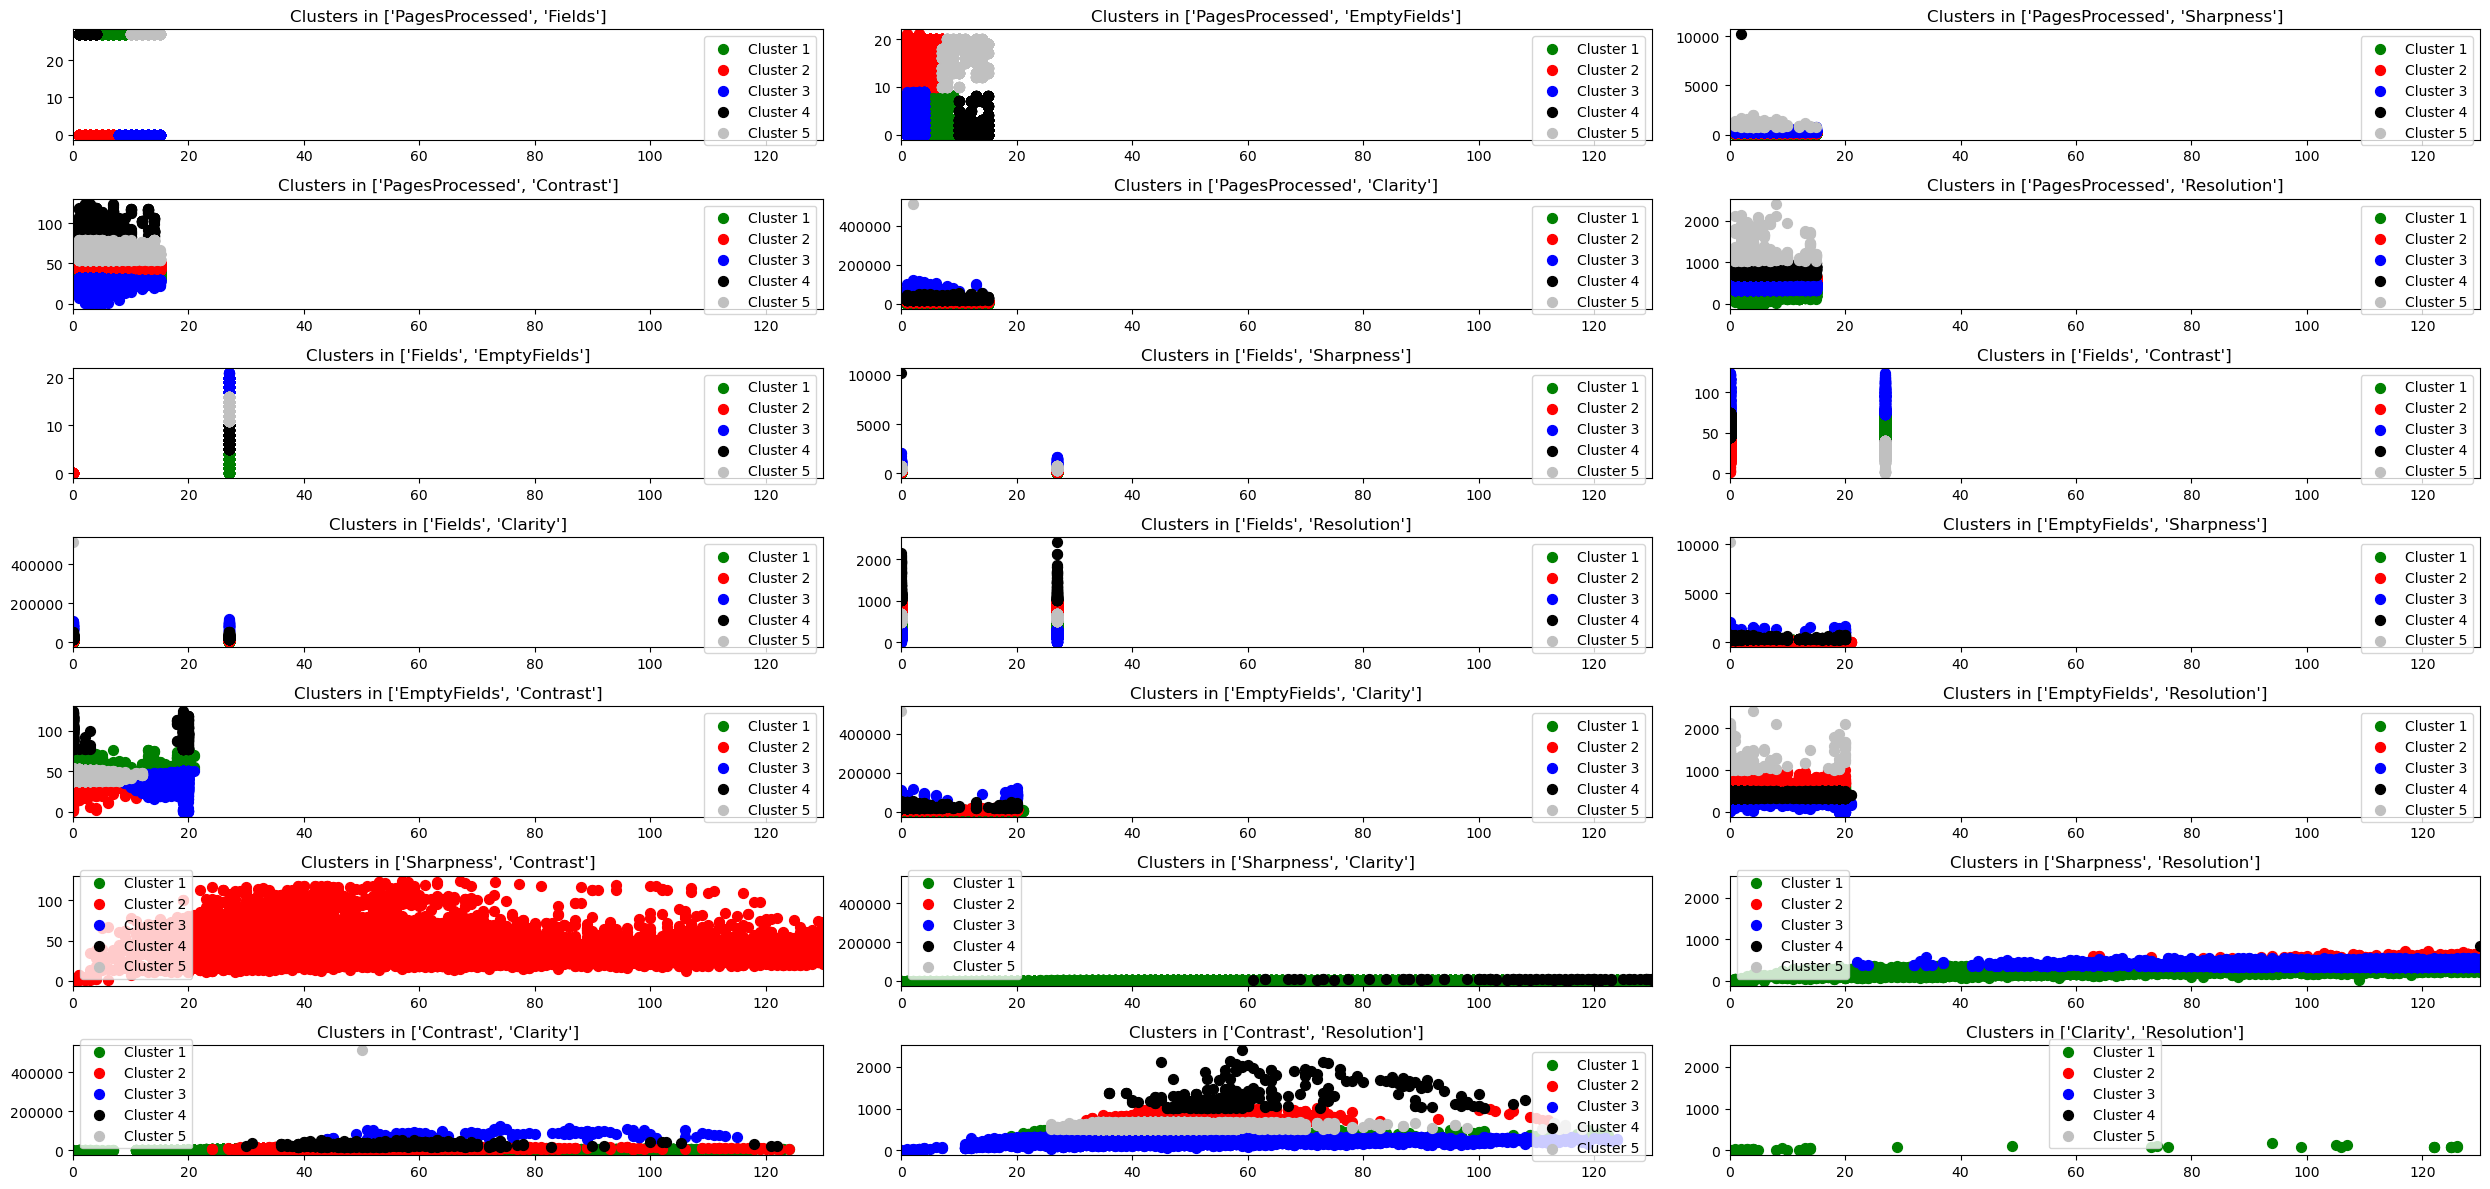

In [26]:
#Define number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_edo_cta = [kmeans.fit_predict(data) for data in X_edo_cta]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_edo_cta,y_edo_cta, X_var)


## Model- Recibo de Nomina

In [27]:
df_nom.head()

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
1,1,15,0,399.0,42.0,17045.0,672.0
2,1,15,3,166.0,29.0,4866.0,233.0
14,1,15,0,370.0,37.0,14051.0,597.0
15,1,15,0,328.0,36.0,11983.0,538.0
43,1,15,1,711.0,59.0,42005.0,1071.0


### Getting the correct number of Clusters

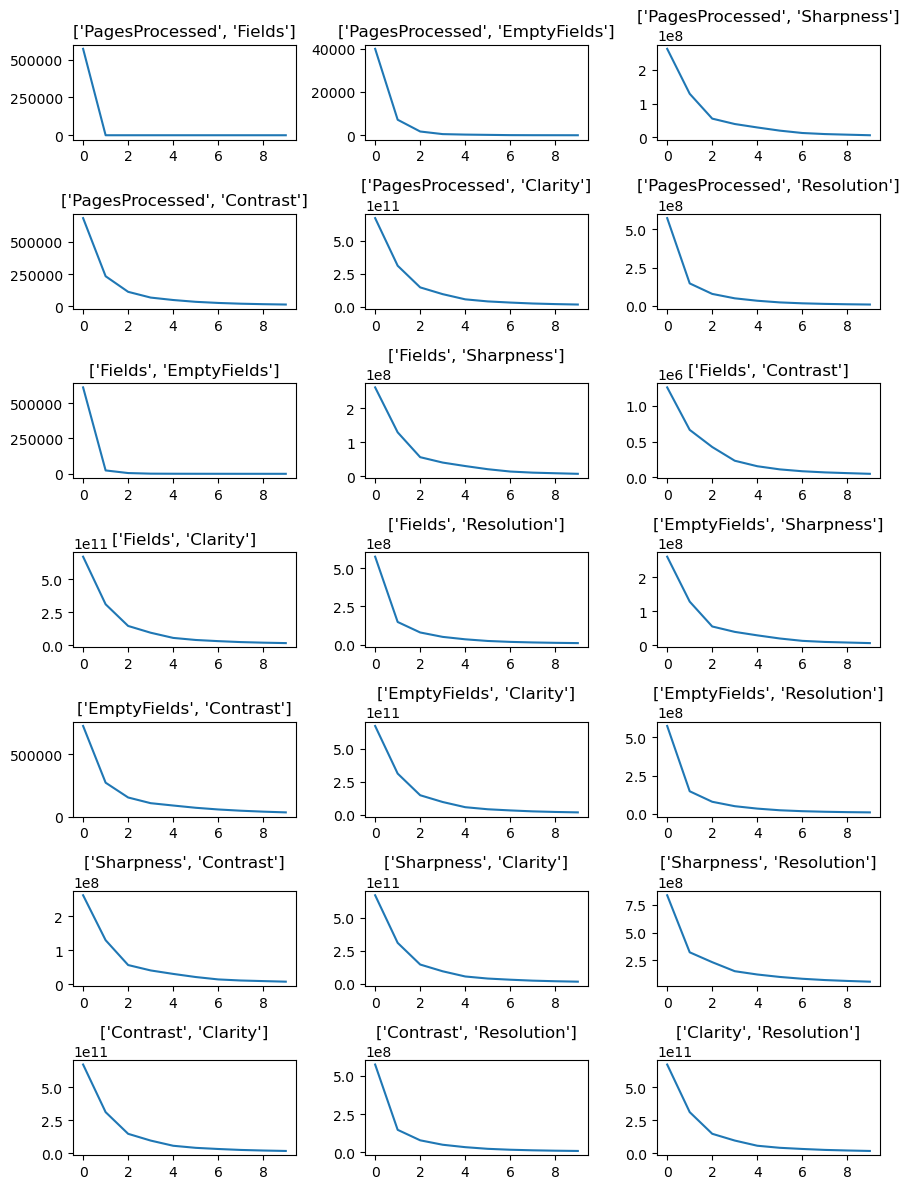

In [28]:
#Make the X by joining the minilists of pairs
X_nom = kmean_func.get_x(X_pairs, df_nom)

#Calculates de wss 
nom_wss = kmean_func.wss_list(X_nom)

#Plot Elbow graphs for each pair 
kmean_func.plt_elbow(nom_wss,X_var)

### Clustering by KMEANS method

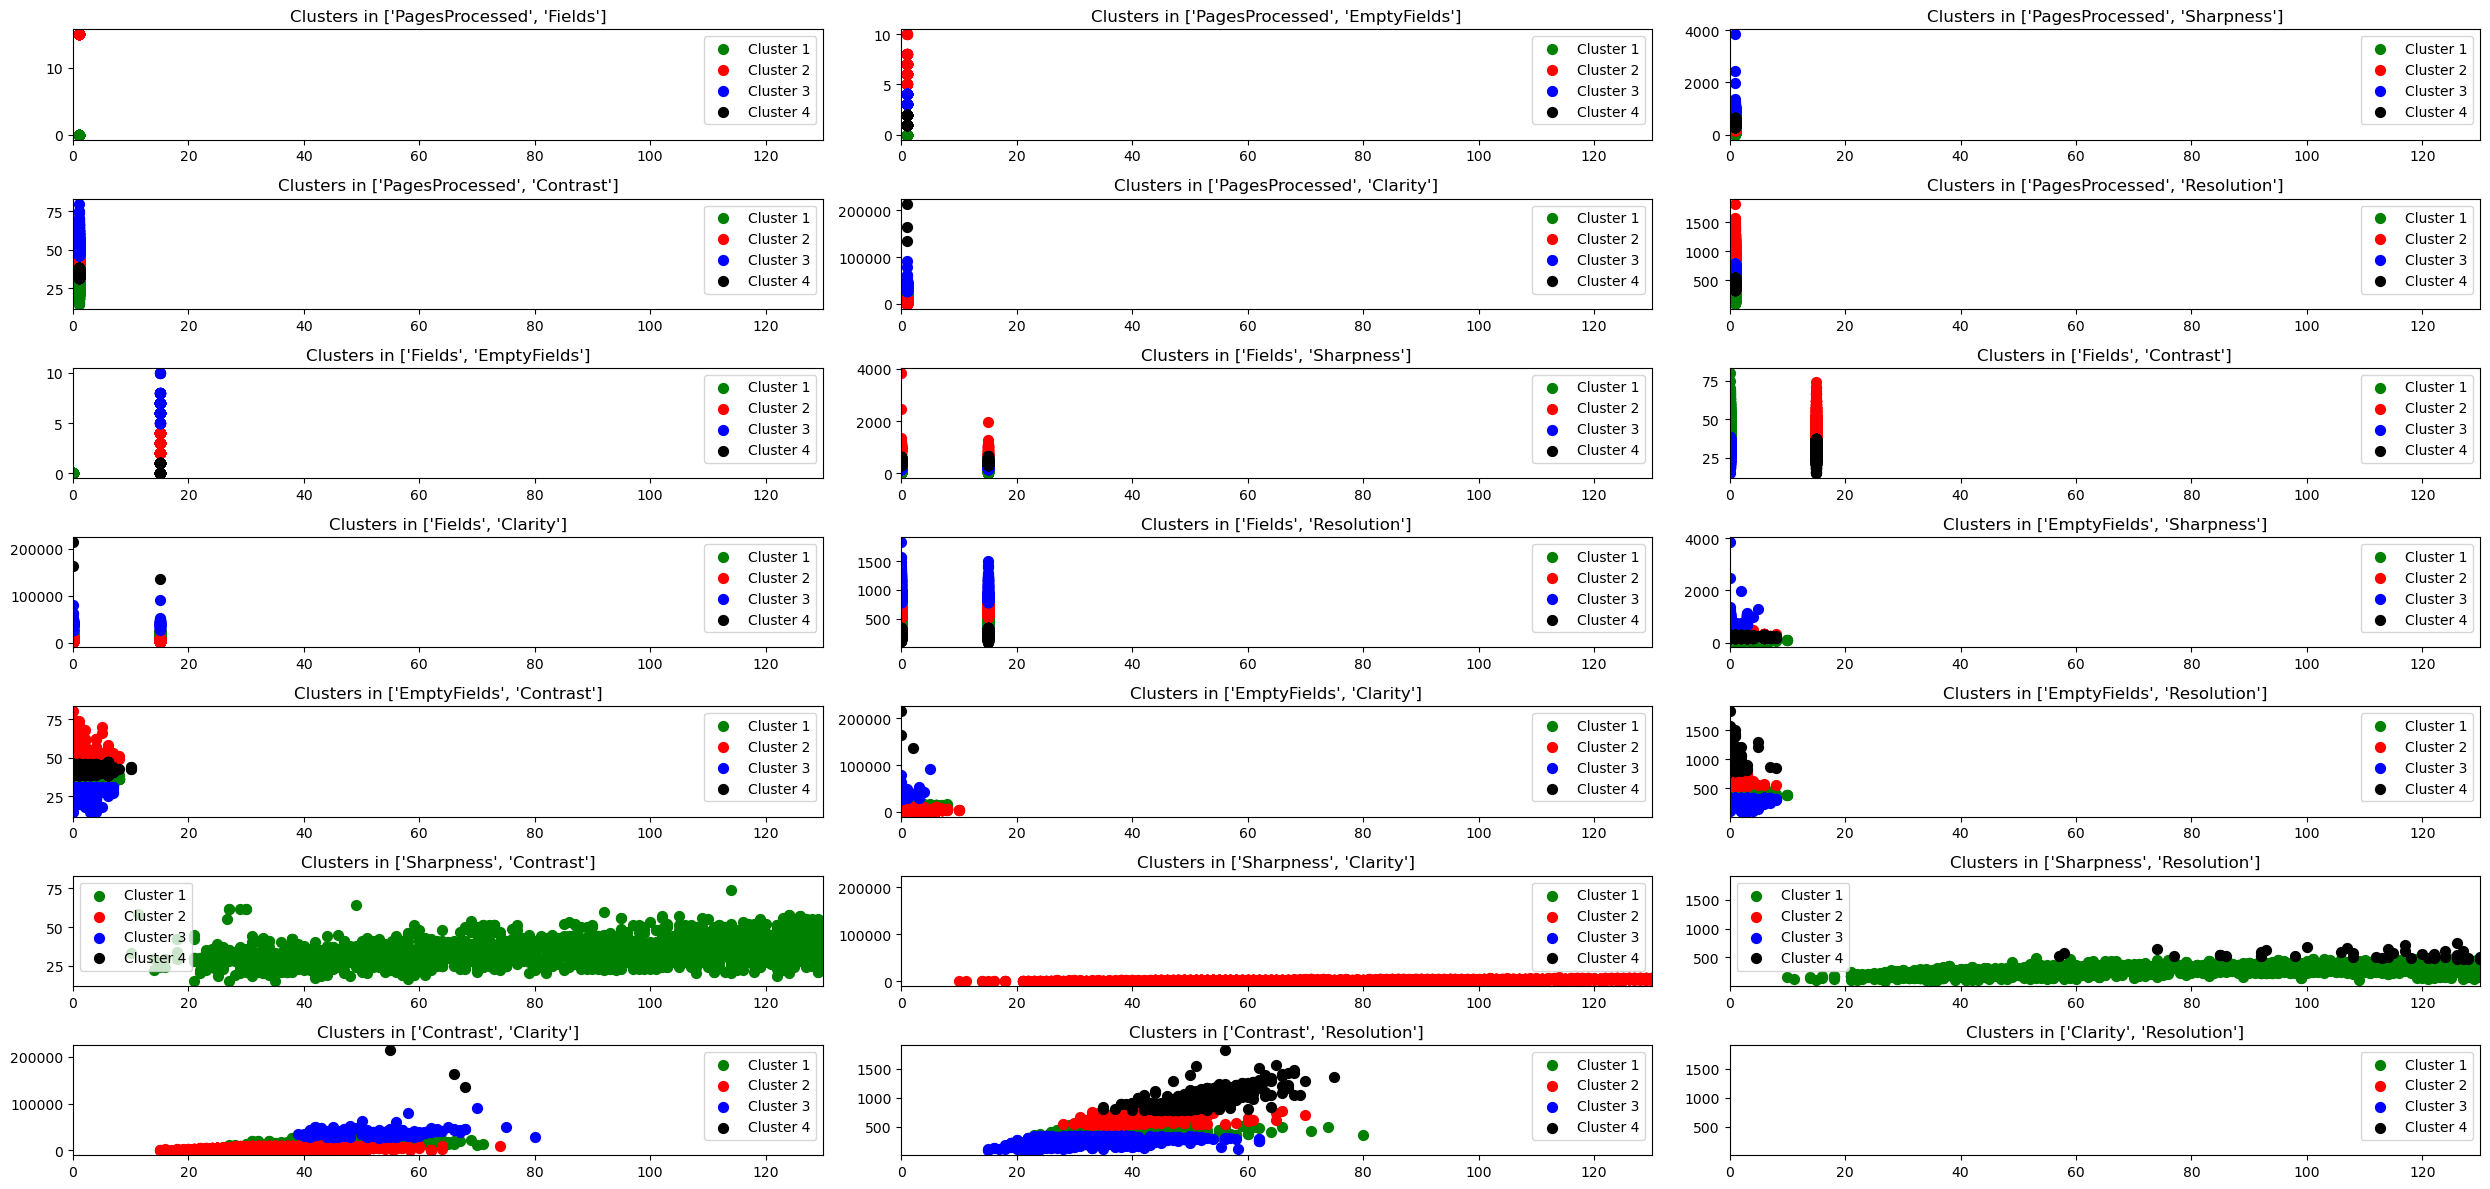

In [29]:
#Define number of clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_nom = [kmeans.fit_predict(data) for data in X_nom]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_nom,y_nom, X_var)


## Model- INE

In [30]:
df_ine.head()

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
3,1,38,11,157.0,38.0,6140.0,356.0
7,1,38,11,174.0,41.0,7275.0,394.0
9,1,38,11,174.0,41.0,7275.0,394.0
16,1,38,11,60.0,50.0,3054.0,354.0
22,1,38,7,92.0,47.0,4423.0,422.0


### Getting the correct number of Clusters

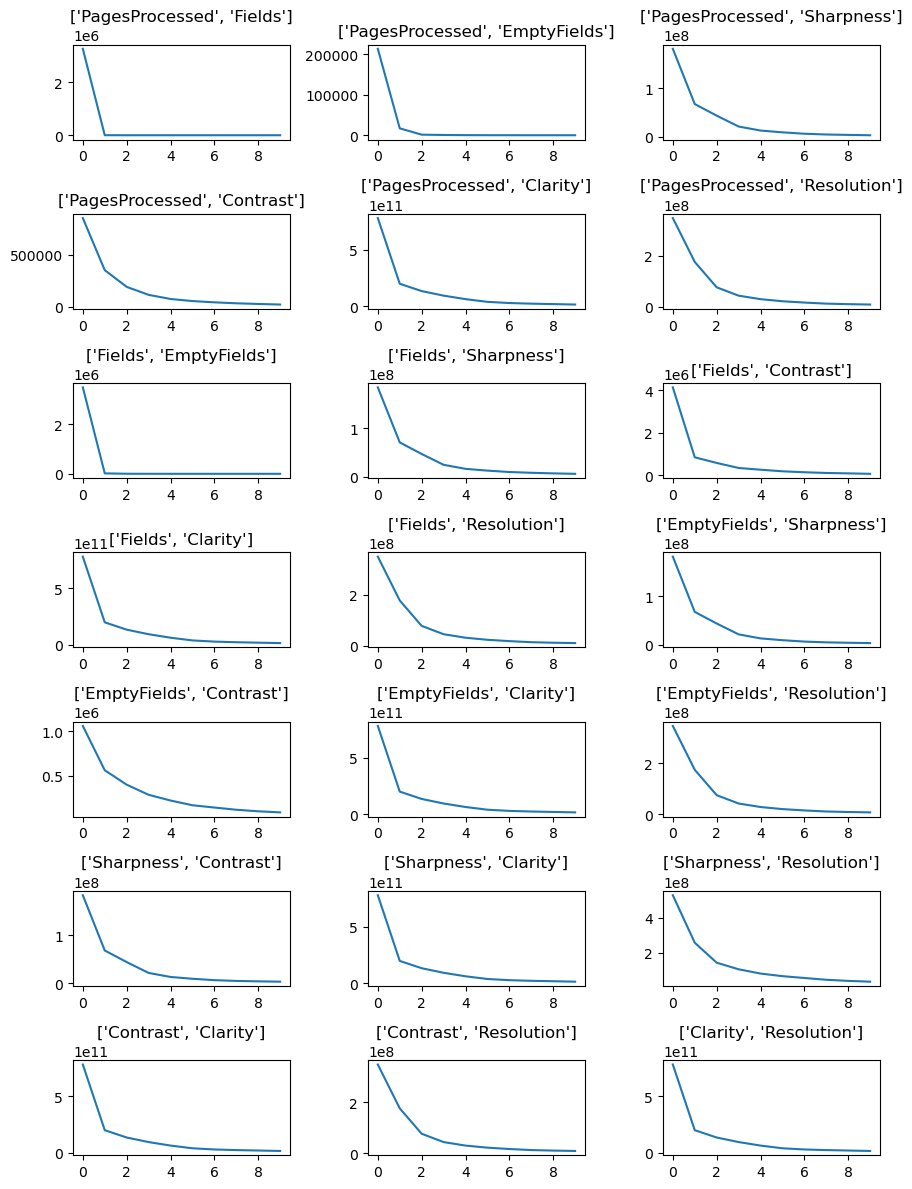

In [31]:
#Make the X by joining the minilists of pairs
X_ine = kmean_func.get_x(X_pairs, df_ine)

#Calculates de wss 
ine_wss = kmean_func.wss_list(X_ine)

#Plot Elbow graphs for each pair 

kmean_func.plt_elbow(ine_wss,X_var)

### Clustering by KMEANS method

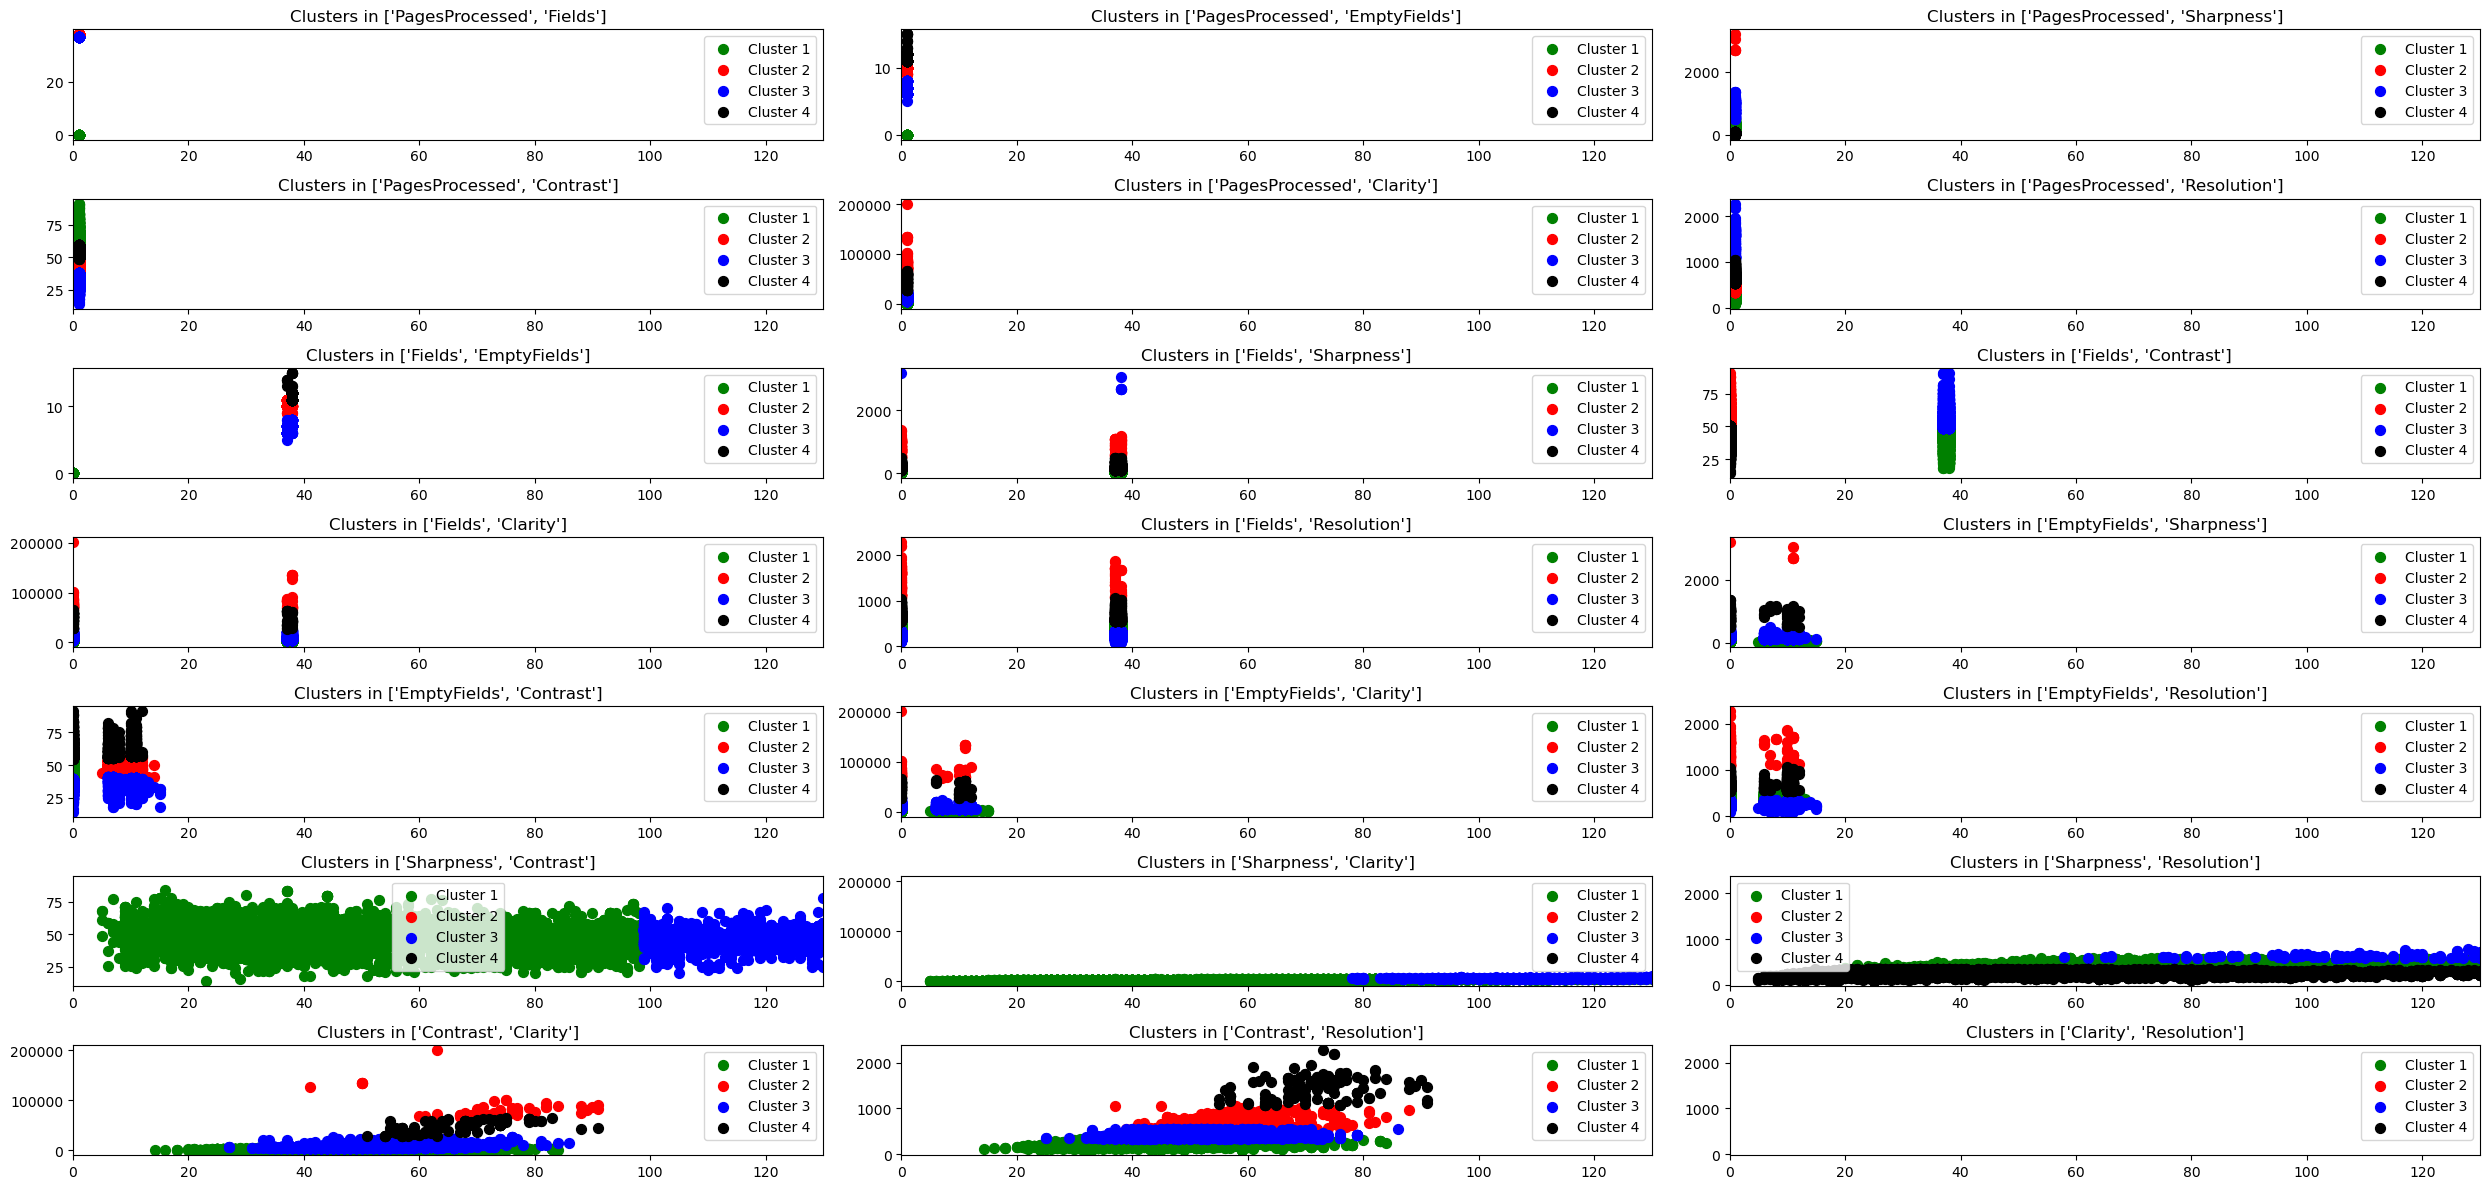

In [32]:
#Define number of clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_ine = [kmeans.fit_predict(data) for data in X_ine]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_ine,y_ine, X_var)


## Model- Comprobante de domicilio

In [33]:
df_addy.head()

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
0,1,12,0,64.0,38.0,2523.0,263.0
52,1,12,0,157.0,32.0,5066.0,340.0
85,1,12,0,566.0,59.0,33499.0,682.0
122,1,12,0,129.0,40.0,5214.0,302.0
125,1,12,0,104.0,45.0,4755.0,364.0


### Getting the correct number of Clusters

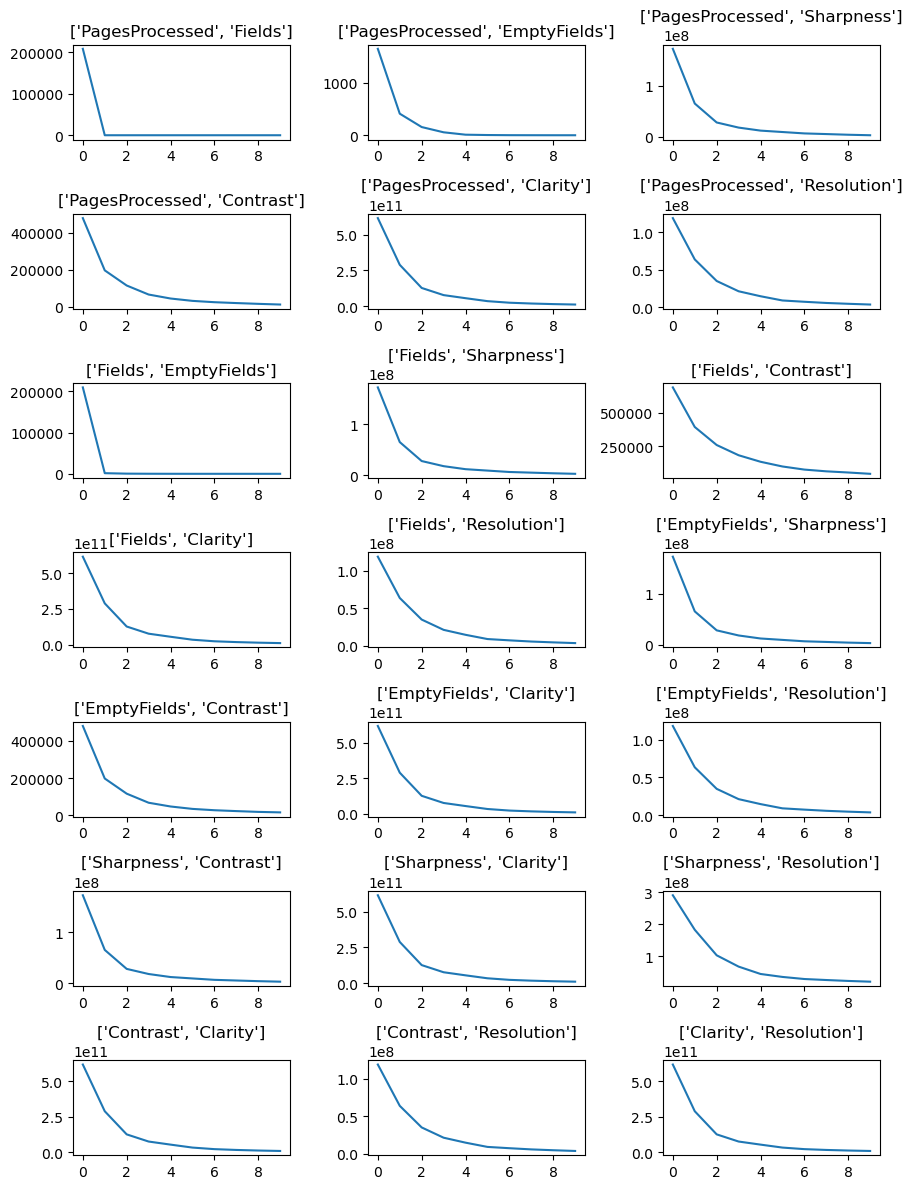

In [34]:
#Make the X by joining the minilists of pairs
X_addy = kmean_func.get_x(X_pairs, df_addy)

#Calculates de wss 
addy_wss = kmean_func.wss_list(X_addy)

#Plot Elbow graphs for each pair 
kmean_func.plt_elbow(addy_wss,X_var)

### Clustering by KMEANS method 

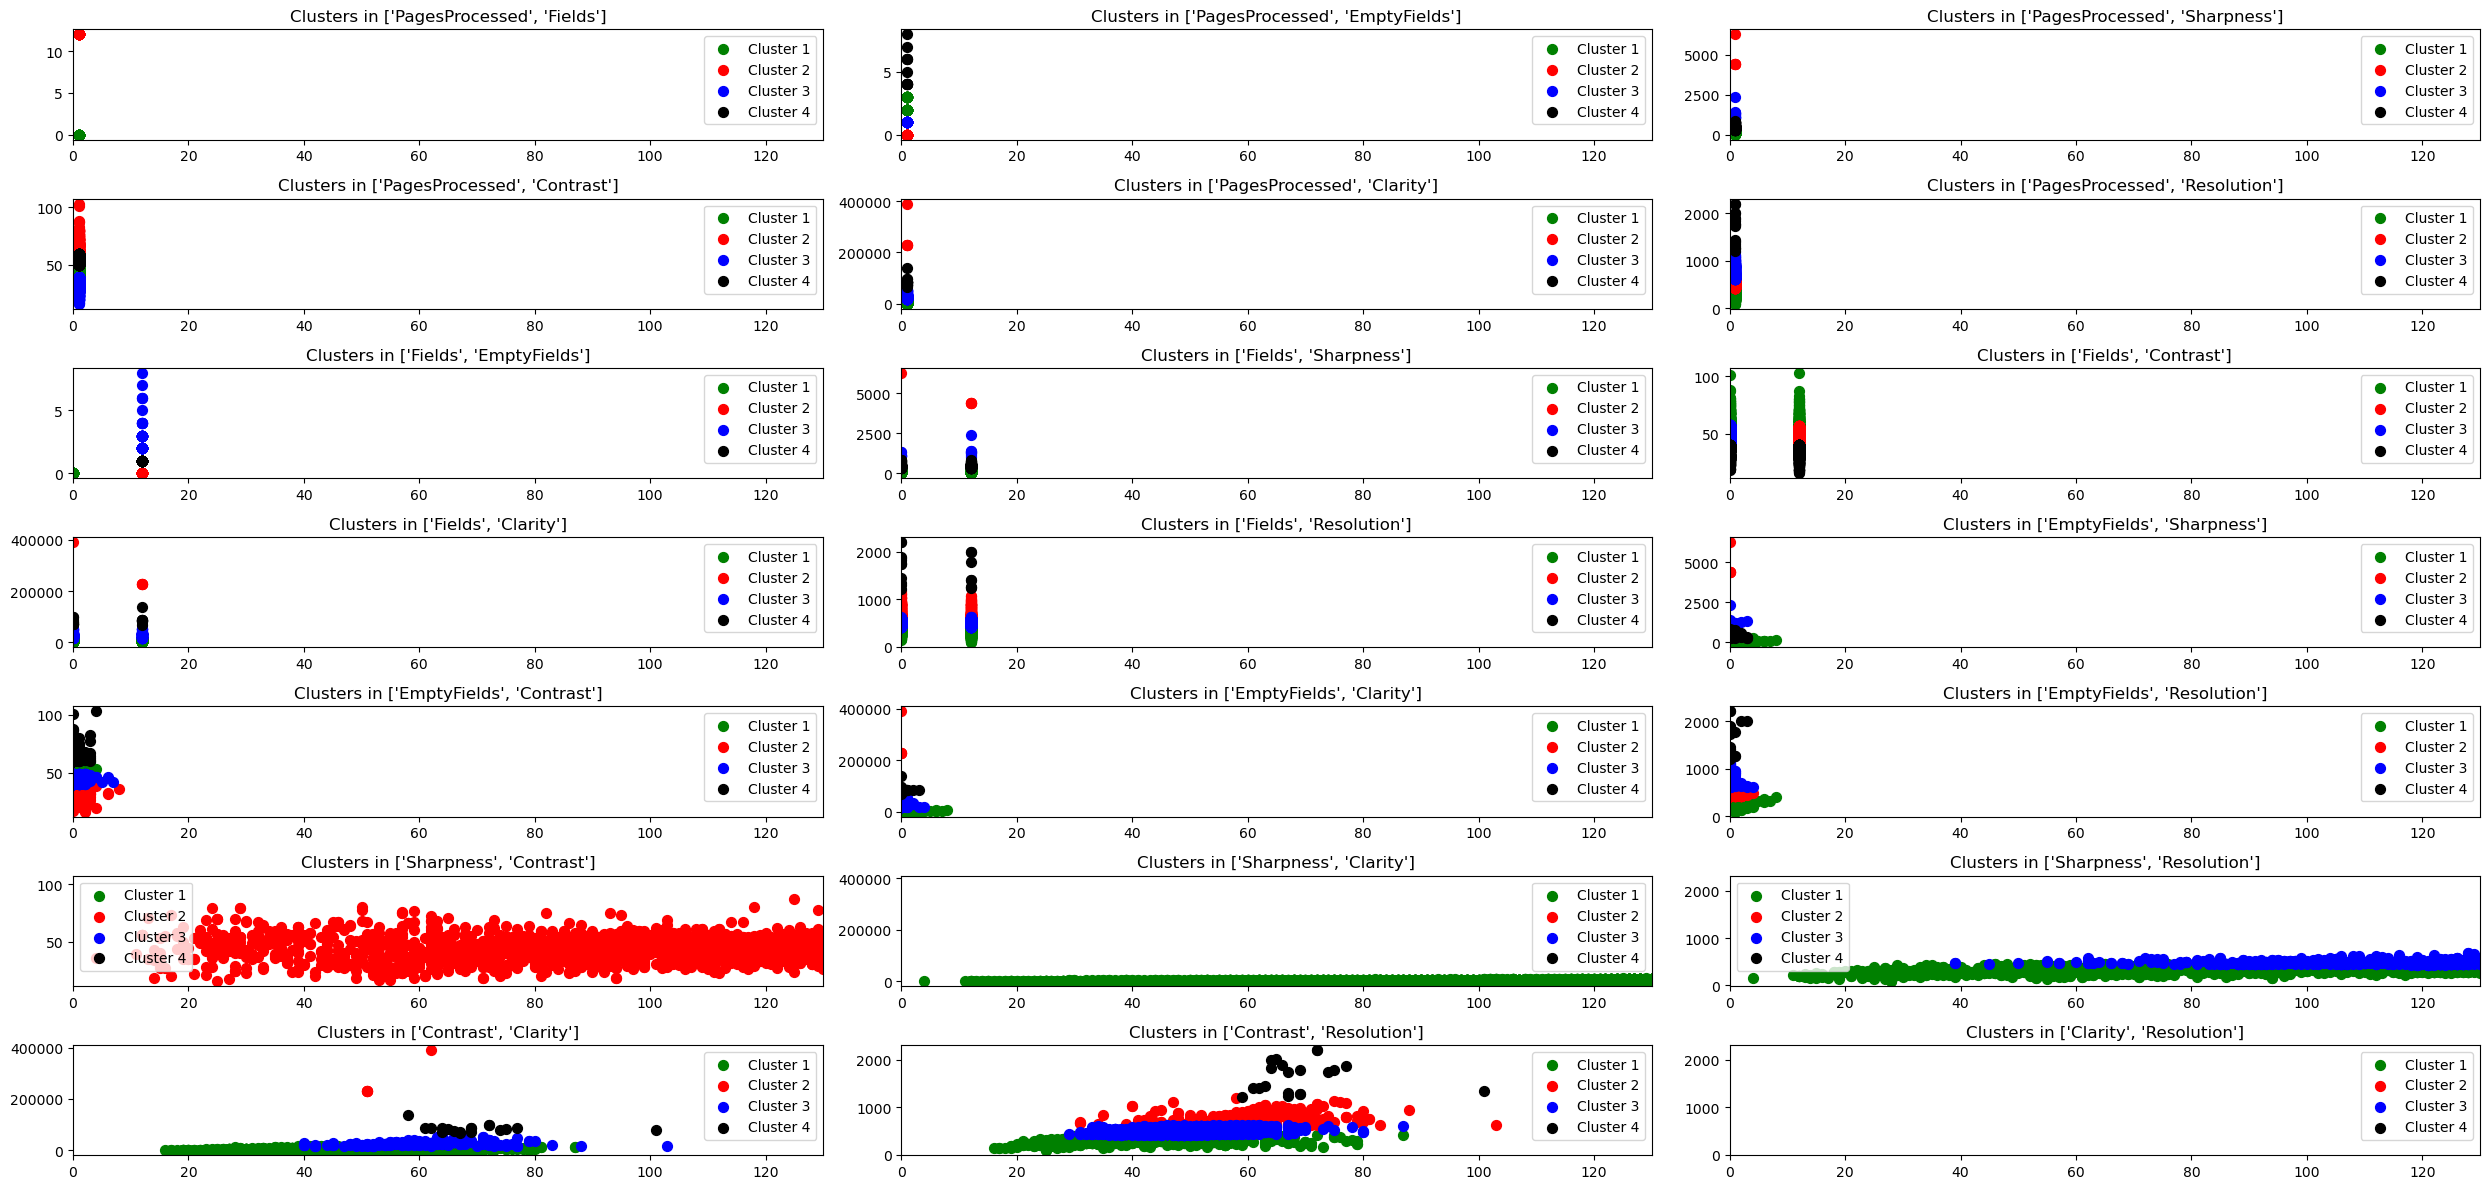

In [35]:
#Define number of clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_addy = [kmeans.fit_predict(data) for data in X_addy]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_addy,y_addy, X_var)

## Model- Carta Libranza

In [36]:
df_lib.head()

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
6,1,19,0,1137.0,51.0,58551.0,376.0
8,1,19,0,1137.0,51.0,58551.0,376.0
21,1,19,0,1127.0,51.0,57854.0,371.0
23,1,19,0,1131.0,51.0,58111.0,373.0
25,1,19,0,1487.0,54.0,80796.0,493.0


### Getting the correct number of Clusters

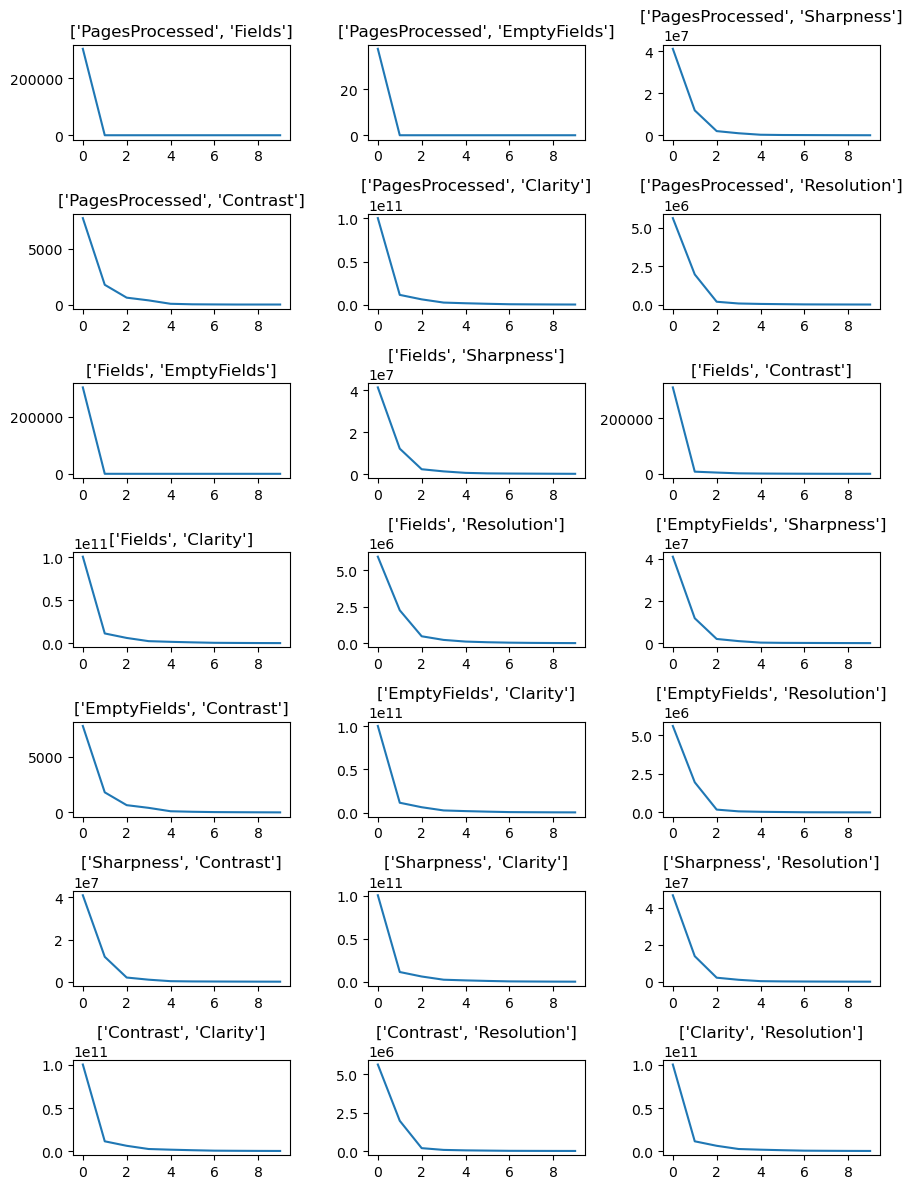

In [37]:
#Make the X by joining the minilists of pairs
X_lib = kmean_func.get_x(X_pairs, df_lib)

#Calculates de wss 
lib_wss = kmean_func.wss_list(X_lib)

#Plot Elbow graphs for each pair 
kmean_func.plt_elbow(lib_wss,X_var)

### Clustering by KMEANS method

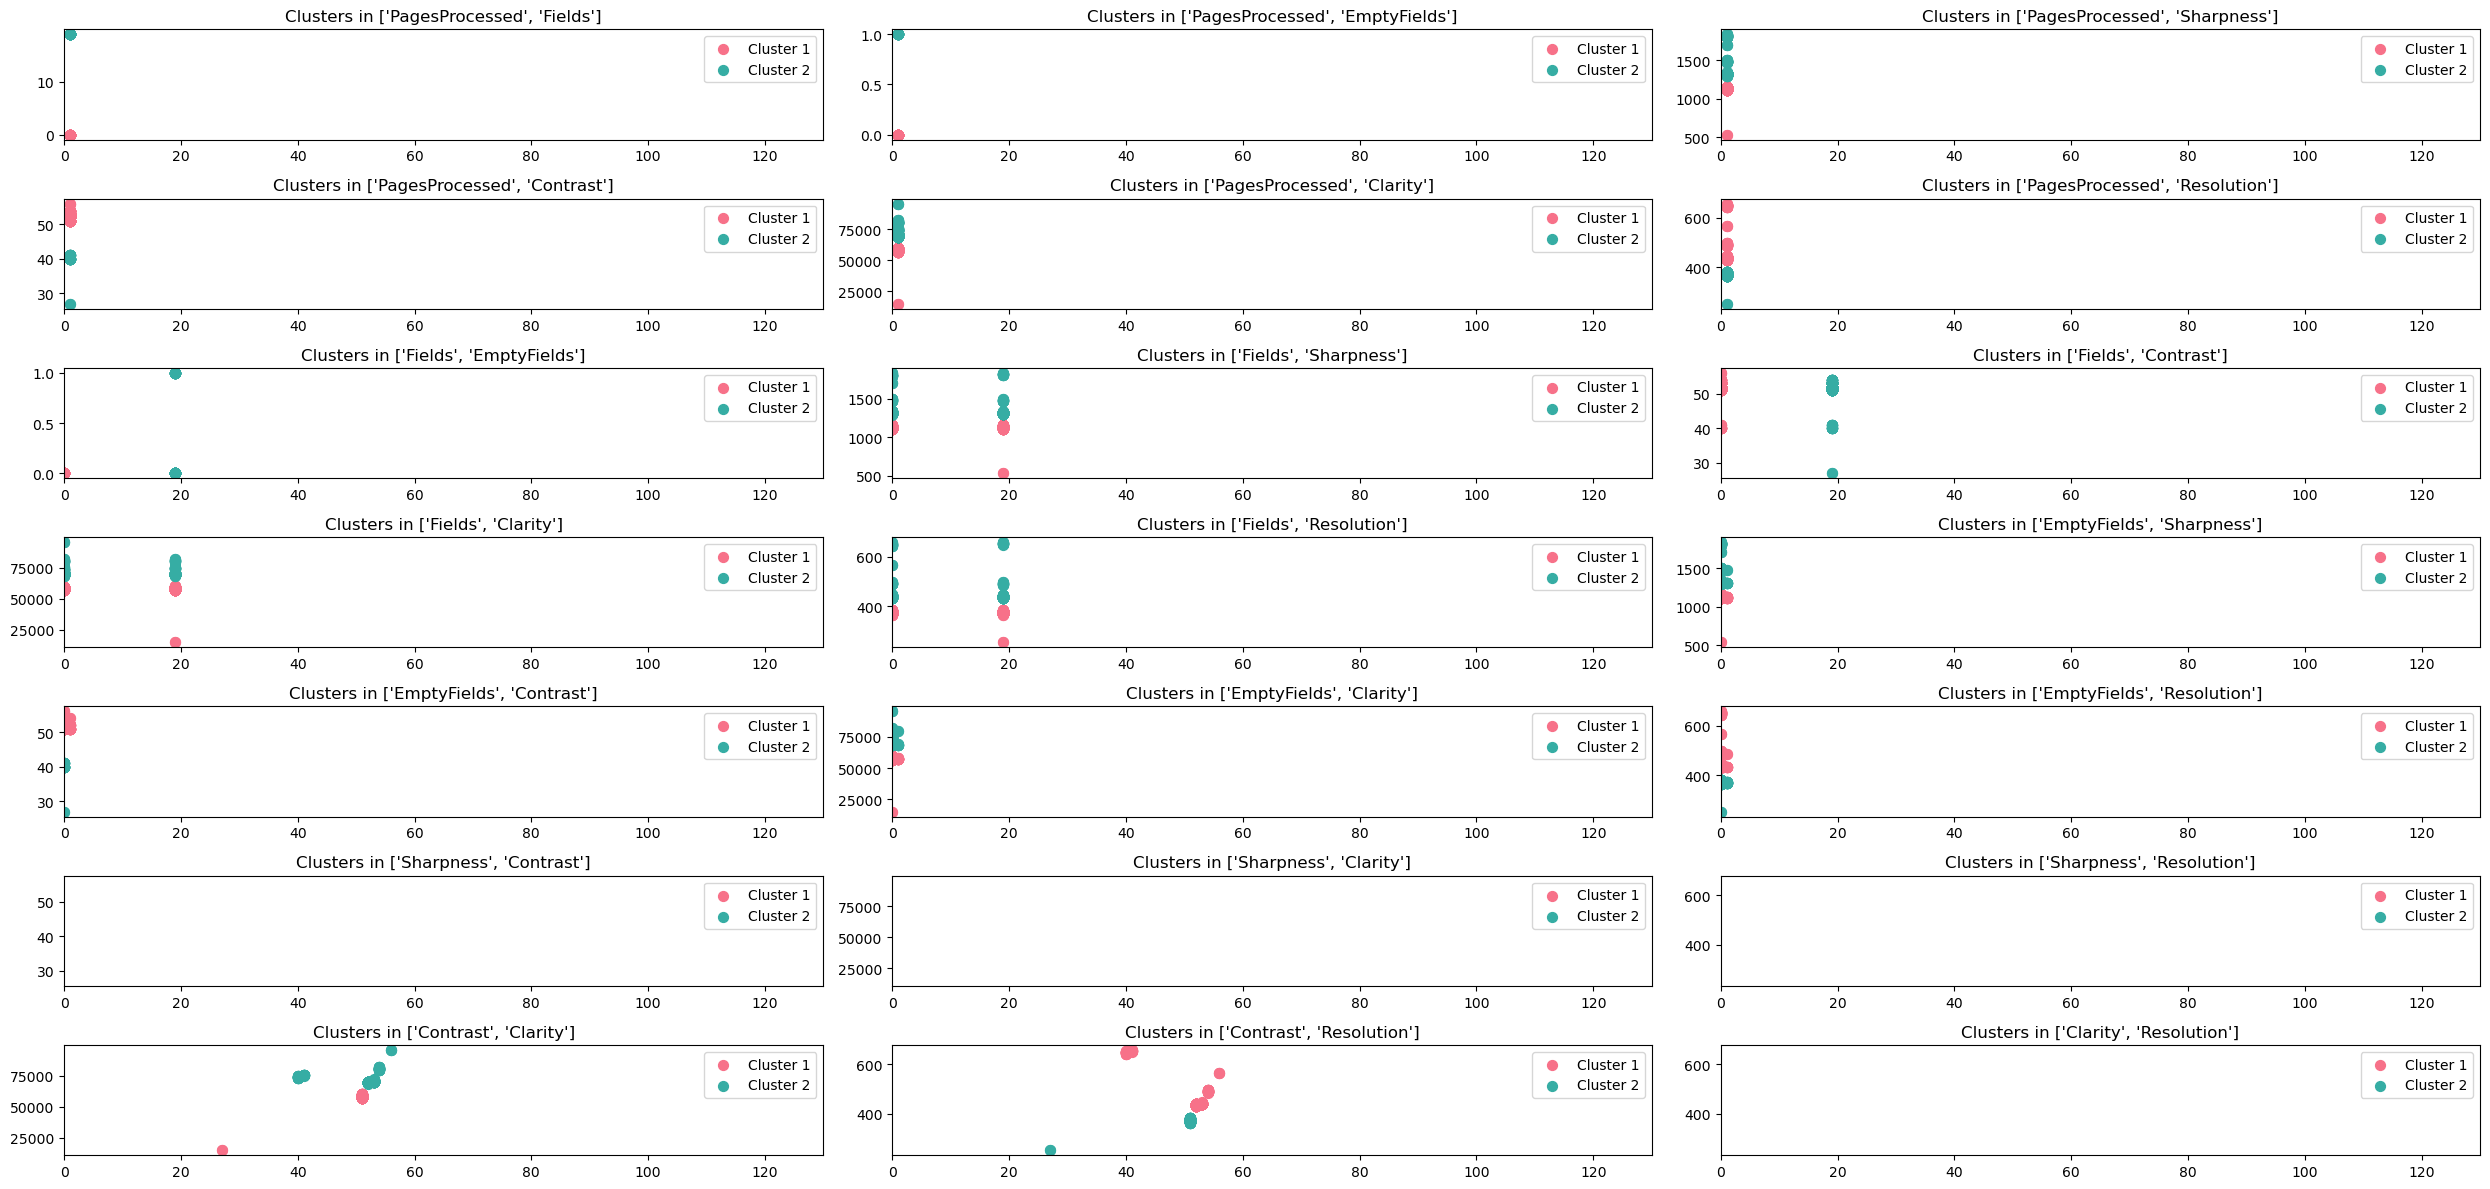

In [38]:
#Define number of clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_lib = [kmeans.fit_predict(data) for data in X_lib]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_lib,y_lib, X_var)